# 1. Import Thư viện và Cấu hình

In [1]:
# Import thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cấu hình hiển thị
%matplotlib inline
sns.set_style("whitegrid")
np.set_printoptions(suppress=True, precision=3)

warnings.filterwarnings('ignore')


# 2. Đọc và Tải Dữ liệu (Data Loading)

In [2]:
# Đọc dữ liệu
DATA_PATH = '../data/raw/ratings_Beauty.csv' 

print(f"Loading data from {DATA_PATH}")

try:
    raw_data = np.genfromtxt(DATA_PATH, delimiter=',', dtype=str, encoding='utf-8', skip_header=1)
    print("Data loaded successfully!")
    print(f"Shape: {raw_data.shape}")
except Exception as e:
    print(f"Error loading data: {e}")


Loading data from ../data/raw/ratings_Beauty.csv
Data loaded successfully!
Shape: (2023070, 4)


# 3. Data Preview

In [3]:
# Tách các cột để dễ xử lý
user_ids = raw_data[:, 0]
product_ids = raw_data[:, 1]
ratings = raw_data[:, 2].astype(float)
timestamps = raw_data[:, 3]

print("--- Data Preview (First 5 rows) ---")
print(f"User IDs:    {user_ids[:5]}")
print(f"Product IDs: {product_ids[:5]}")
print(f"Ratings:     {ratings[:5]}")


--- Data Preview (First 5 rows) ---
User IDs:    ['A39HTATAQ9V7YF' 'A3JM6GV9MNOF9X' 'A1Z513UWSAAO0F' 'A1WMRR494NWEWV'
 'A3IAAVS479H7M7']
Product IDs: ['0205616461' '0558925278' '0558925278' '0733001998' '0737104473']
Ratings:     [5. 3. 5. 4. 1.]


# 4. Thống kê mô tả

In [4]:
# Thống kê mô tả
unique_users = np.unique(user_ids)
unique_products = np.unique(product_ids)

n_users = len(unique_users)
n_products = len(unique_products)
n_ratings = len(ratings)

print("--- Dataset Statistics ---")
print(f"Total Ratings: {n_ratings}")
print(f"Total Unique Users: {n_users}")
print(f"Total Unique Products: {n_products}")
print("-" * 30)
print(f"Min Rating: {np.min(ratings)}")
print(f"Max Rating: {np.max(ratings)}")
print(f"Average Rating: {np.mean(ratings):.2f}")
print(f"Median Rating: {np.median(ratings)}")


--- Dataset Statistics ---
Total Ratings: 2023070
Total Unique Users: 1210271
Total Unique Products: 249274
------------------------------
Min Rating: 1.0
Max Rating: 5.0
Average Rating: 4.15
Median Rating: 5.0


# 5. Phân phối của Ratings

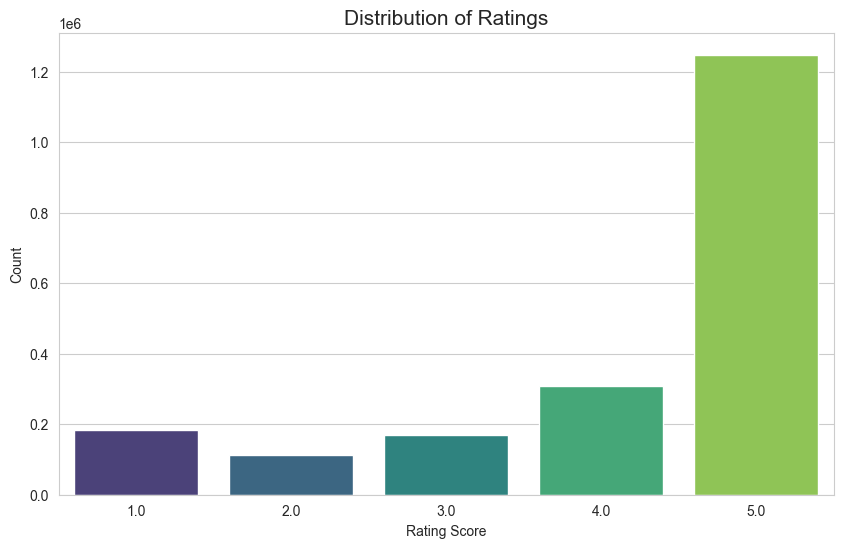

In [5]:
# Đếm số lượng từng loại rating
rating_values, rating_counts = np.unique(ratings, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_values, y=rating_counts, palette="viridis")
plt.title("Distribution of Ratings", fontsize=15)
plt.xlabel("Rating Score")
plt.ylabel("Count")
plt.show()


# 6. Phân tích độ thưa của dữ liệu (Sparsity Analysis)

Matrix Sparsity: 99.9993%
Density: 0.0007%


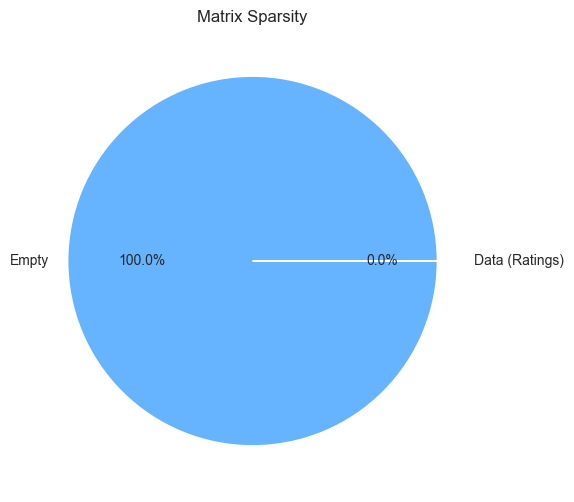

In [6]:
# Tính độ thưa
total_elements = n_users * n_products
sparsity = 1 - (n_ratings / total_elements)

print(f"Matrix Sparsity: {sparsity * 100:.4f}%")
print(f"Density: {(1 - sparsity) * 100:.4f}%")

# Trực quan hóa độ thưa (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie([1-sparsity, sparsity], labels=['Data (Ratings)', 'Empty'], 
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], explode=(0.1, 0))
plt.title("Matrix Sparsity")
plt.show()


# 7. Phân tích phân phối Long-Tail

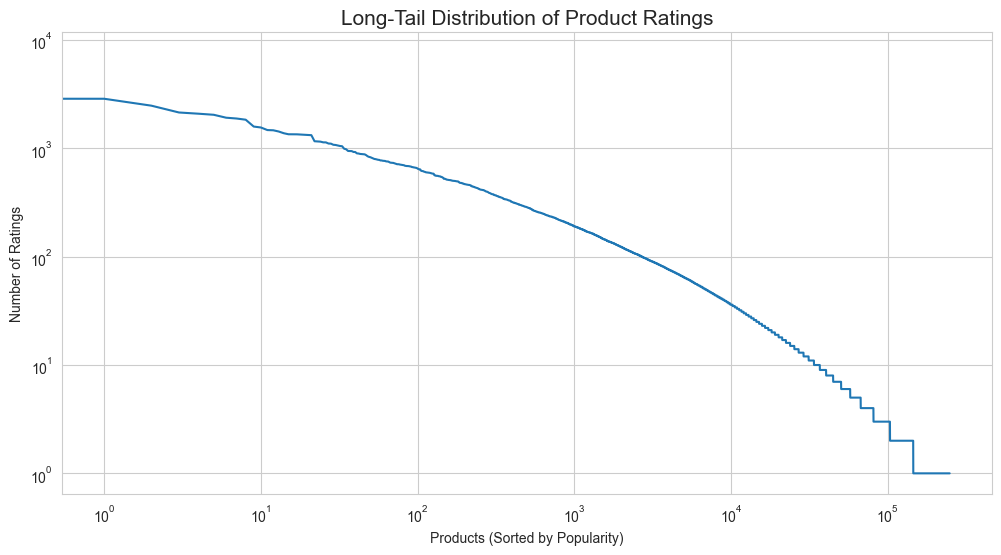

In [7]:
# Đếm số rating cho mỗi sản phẩm
_, product_counts = np.unique(product_ids, return_counts=True)

# Sắp xếp giảm dần để vẽ biểu đồ
sorted_product_counts = np.sort(product_counts)[::-1]

plt.figure(figsize=(12, 6))
plt.plot(sorted_product_counts)
plt.title("Long-Tail Distribution of Product Ratings", fontsize=15)
plt.xlabel("Products (Sorted by Popularity)")
plt.ylabel("Number of Ratings")
plt.xscale('log') # Dùng thang đo log để dễ nhìn phần đuôi
plt.yscale('log')
plt.show()


# 8. Phân tích theo Nguyên lý Pareto

Tổng số sản phẩm: 249274
Số lượng sản phẩm tạo ra 80% rating: 50122
Tỷ lệ: 20.11% số sản phẩm chiếm 80% tổng tương tác.


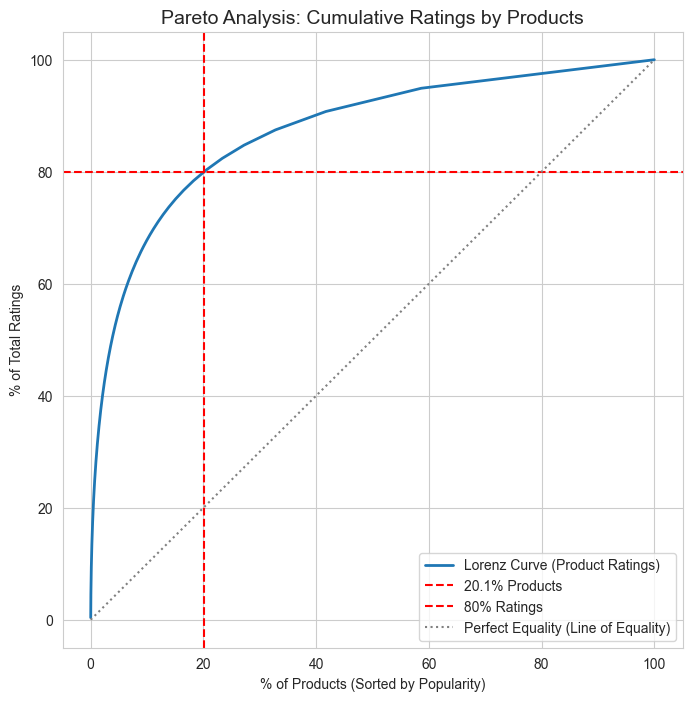

In [8]:
# 1. Đếm số lượng rating cho mỗi sản phẩm (Product Popularity)
_, product_counts = np.unique(product_ids, return_counts=True)

# 2. Sắp xếp số lượng rating từ Cao xuống Thấp
sorted_indices = np.argsort(product_counts)[::-1]
sorted_counts = product_counts[sorted_indices]

# 3. Tính tổng tích lũy (Cumulative Sum) - Vectorization
cumulative_ratings = np.cumsum(sorted_counts)
total_ratings = cumulative_ratings[-1]
cumulative_percent = (cumulative_ratings / total_ratings) * 100

# 4. Xác định mốc 80% rating nằm ở đâu
index_80_percent = np.searchsorted(cumulative_percent, 80.0)

# 5. Tính toán tỷ lệ sản phẩm
num_products_top_80 = index_80_percent + 1
total_products = len(sorted_counts)
product_percent_making_80 = (num_products_top_80 / total_products) * 100

# --- KẾT QUẢ ---
print(f"Tổng số sản phẩm: {total_products}")
print(f"Số lượng sản phẩm tạo ra 80% rating: {num_products_top_80}")
print(f"Tỷ lệ: {product_percent_making_80:.2f}% số sản phẩm chiếm 80% tổng tương tác.")

# 6. Vẽ biểu đồ Pareto (Lorenz Curve)
plt.figure(figsize=(8, 8))
x_axis = (np.arange(total_products) + 1) / total_products * 100
y_axis = cumulative_percent

plt.plot(x_axis, y_axis, linewidth=2, label='Lorenz Curve (Product Ratings)')
plt.axvline(x=product_percent_making_80, color='r', linestyle='--', label=f'{product_percent_making_80:.1f}% Products')
plt.axhline(y=80, color='r', linestyle='--', label='80% Ratings')
plt.plot([0, 100], [0, 100], color='gray', linestyle=':', label='Perfect Equality (Line of Equality)')

plt.title("Pareto Analysis: Cumulative Ratings by Products", fontsize=14)
plt.xlabel("% of Products (Sorted by Popularity)")
plt.ylabel("% of Total Ratings")
plt.legend()
plt.grid(True)
plt.show()



# 9. Phân tích hoạt động của người dùng (User Activity)


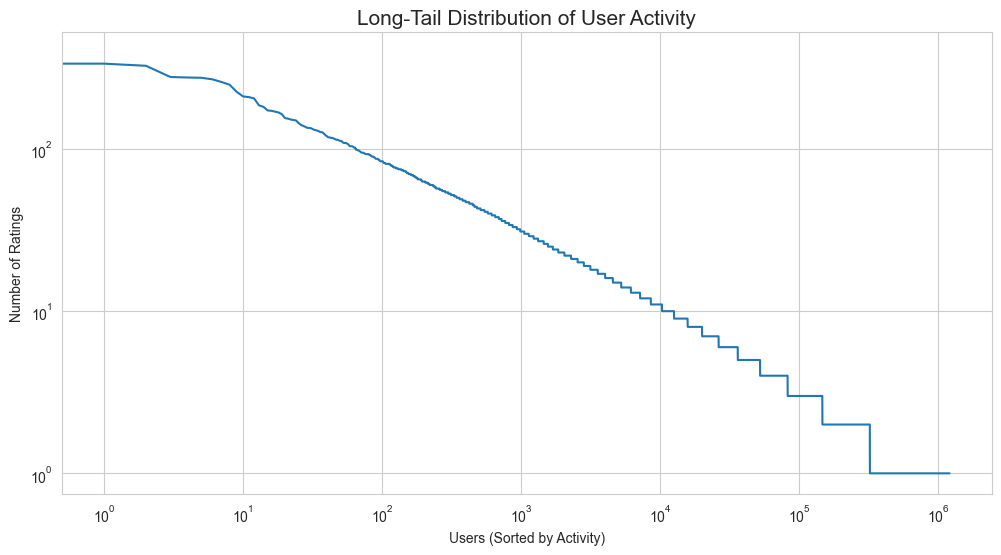

Tổng số người dùng: 1210271
Số lượng người dùng tích cực nhất tạo ra 80% rating: 805657
Tỷ lệ: 66.57% người dùng chiếm 80% tổng tương tác.


In [9]:
# 1. Đếm số lượng rating cho mỗi user
_, user_counts = np.unique(user_ids, return_counts=True)

# 2. Sắp xếp số lượng rating từ Cao xuống Thấp
sorted_user_indices = np.argsort(user_counts)[::-1]
sorted_user_counts = user_counts[sorted_user_indices]

# 3. Vẽ biểu đồ Long-Tail cho User
plt.figure(figsize=(12, 6))
plt.plot(sorted_user_counts)
plt.title("Long-Tail Distribution of User Activity", fontsize=15)
plt.xlabel("Users (Sorted by Activity)")
plt.ylabel("Number of Ratings")
plt.xscale('log')
plt.yscale('log')
plt.show()

# 4. Phân tích Pareto cho User
cumulative_user_ratings = np.cumsum(sorted_user_counts)
total_user_ratings = cumulative_user_ratings[-1]
cumulative_user_percent = (cumulative_user_ratings / total_user_ratings) * 100

index_80_percent_users = np.searchsorted(cumulative_user_percent, 80.0)

num_users_top_80 = index_80_percent_users + 1
total_users = len(sorted_user_counts)
user_percent_making_80 = (num_users_top_80 / total_users) * 100

# --- KẾT QUẢ ---
print(f"Tổng số người dùng: {total_users}")
print(f"Số lượng người dùng tích cực nhất tạo ra 80% rating: {num_users_top_80}")
print(f"Tỷ lệ: {user_percent_making_80:.2f}% người dùng chiếm 80% tổng tương tác.")



# 10. Phân tích theo Thời gian (Time-based Analysis)


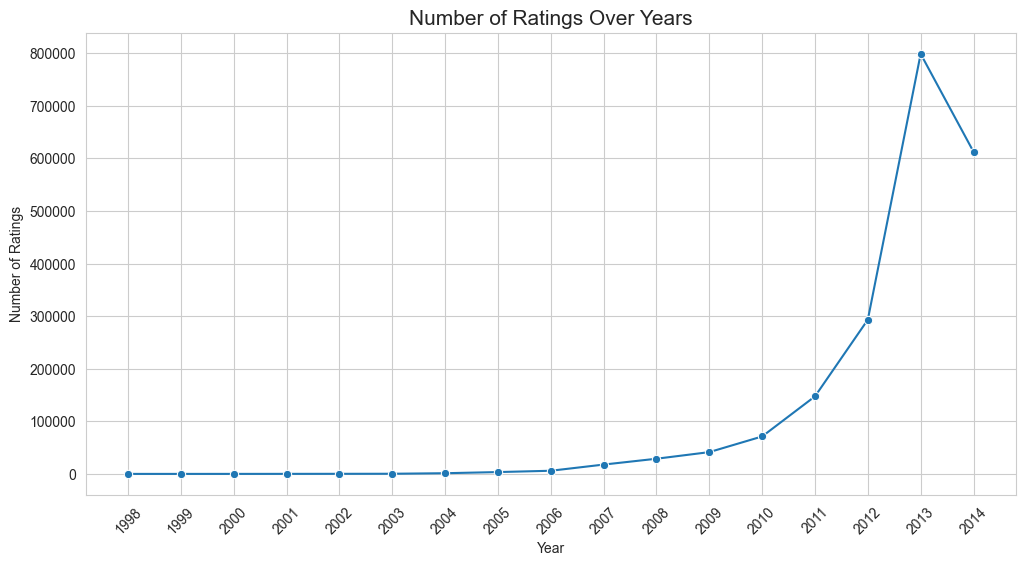

--- RATINGS PER YEAR ---
Year 1998: 2 ratings
Year 1999: 5 ratings
Year 2000: 16 ratings
Year 2001: 76 ratings
Year 2002: 163 ratings
Year 2003: 278 ratings
Year 2004: 1308 ratings
Year 2005: 3476 ratings
Year 2006: 5990 ratings
Year 2007: 17728 ratings
Year 2008: 28862 ratings
Year 2009: 41429 ratings
Year 2010: 71236 ratings
Year 2011: 147490 ratings
Year 2012: 293339 ratings
Year 2013: 798903 ratings
Year 2014: 612769 ratings


In [10]:

# --- TIME-BASED ANALYSIS ---

# 1. Chuyển đổi Timestamps (dạng chuỗi Unix time) sang định dạng datetime của NumPy
timestamps_dt = timestamps.astype(int).astype('datetime64[s]')

# 2. Trích xuất thông tin năm từ datetime
years = timestamps_dt.astype('datetime64[Y]').astype(int) + 1970

# 3. Đếm số lượng rating theo từng năm
unique_years, year_counts = np.unique(years, return_counts=True)

# 4. Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(x=unique_years, y=year_counts, marker='o')
plt.title("Number of Ratings Over Years", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.xticks(unique_years, rotation=45)
plt.grid(True)
plt.show()

# --- KẾT QUẢ ---
print("--- RATINGS PER YEAR ---")
for year, count in zip(unique_years, year_counts):
    print(f"Year {year}: {count} ratings")


# 11. Phân tích và Nhận xét

1.  **Thống kê tổng quan**:
    *   Có **1,210,271** người dùng (users) và **249,274** sản phẩm (products) khác nhau.
    *   Điểm đánh giá (rating) nằm trong khoảng từ 1.0 đến 5.0, với điểm trung bình là **4.15**. Điều này cho thấy hầu hết các đánh giá đều khá tích cực.

2.  **Phân phối của Ratings**:
    *   Biểu đồ cho thấy phần lớn các sản phẩm được đánh giá **5 sao**, chiếm số lượng áp đảo. Điều này củng cố nhận định rằng người dùng có xu hướng để lại đánh giá khi họ rất hài lòng.
    *   Số lượng đánh giá 1, 2, và 3 sao thấp hơn đáng kể.

3.  **Độ thưa của dữ liệu (Sparsity)**:
    *   Ma trận User-Item cực kỳ thưa, với độ thưa lên đến **99.9993%**.
    *   Điều này có nghĩa là chỉ có khoảng **0.0007%** các cặp (user, item) có sự tương tác (rating). Đây là một thách thức lớn đối với các hệ thống gợi ý.

4.  **Phân phối Long-Tail (Sản phẩm và Người dùng)**:
    *   **Sản phẩm**: Một số ít sản phẩm "bom tấn" nhận được rất nhiều lượt đánh giá, trong khi phần lớn các sản phẩm còn lại chỉ có rất ít tương tác.
    *   **Người dùng**: Tương tự, một nhóm nhỏ người dùng rất tích cực ("power users") đã để lại một số lượng lớn đánh giá, trong khi đa số người dùng chỉ đánh giá một vài lần.

5.  **Phân tích theo Nguyên lý Pareto (80/20)**:
    *   **Sản phẩm**: Khoảng **20.11%** sản phẩm hàng đầu tạo ra **80%** tổng số lượt đánh giá. Dữ liệu tuân thủ chặt chẽ nguyên lý Pareto, cho thấy sự thống trị của một nhóm nhỏ sản phẩm phổ biến.
    *   **Người dùng**: Cần tới **66.57%** người dùng tích cực nhất để tạo ra 80% tổng số đánh giá. Điều này cho thấy hoạt động của người dùng được phân phối đều hơn so với sự phổ biến của sản phẩm. Không có một nhóm quá nhỏ "power users" nào chiếm đa số tuyệt đối.

6.  **Phân tích theo Thời gian**:
    *   Dữ liệu rating có từ năm 1998 nhưng chỉ thực sự bùng nổ từ khoảng năm 2011.
    *   Số lượng ratings đạt đỉnh vào năm **2013** và **2014**, chiếm phần lớn tổng dữ liệu. Điều này cho thấy nền tảng có thể đã có sự tăng trưởng người dùng đột biến hoặc triển khai các chiến dịch khuyến khích đánh giá trong giai đoạn này.

## Các Insights chính

*   **Dữ liệu rất tích cực nhưng cực kỳ thưa**: Người dùng có xu hướng đánh giá cao (trung bình 4.15, chủ yếu là 5 sao), nhưng mỗi người chỉ đánh giá một phần rất nhỏ trong tổng số sản phẩm. Mô hình sẽ khó học được "khẩu vị tiêu cực" (người dùng ghét gì) để tránh gợi ý sai. Hầu hết người dùng chỉ tương tác một vài lần, nên cần phải lọc dữ liệu (ví dụ: giữ lại user có ít nhất 5 ratings) để xây dựng mô hình hiệu quả hơn.
*   **Thị trường bị chi phối bởi sản phẩm phổ biến**: Một số ít sản phẩm chiếm phần lớn sự quan tâm. Hệ thống gợi ý sẽ có xu hướng chỉ recommend các sản phẩm "Top hit" này. Đây là cơ hội để giới thiệu các sản phẩm ở "đuôi dài" (long-tail) đến những người dùng phù hợp, giúp đa dạng hóa khám phá.
*   **Dữ liệu có tính thời điểm**: Sự bùng nổ của ratings trong giai đoạn 2013-2014 cho thấy hành vi và sở thích của người dùng có thể đã thay đổi theo thời gian. Các mô hình gợi ý có thể cần xem xét yếu tố thời gian để nắm bắt các xu hướng mới nhất.
*   **Thách thức về tính toán**: Độ thưa cao và số lượng lớn người dùng/sản phẩm đòi hỏi các phương pháp lưu trữ và tính toán ma trận phải hiệu quả (ví dụ: sử dụng ma trận thưa - `scipy.sparse`) để tránh lãng phí bộ nhớ và thời gian.